<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">PROJET - Logement </h1>
</div>

**Votre tâche consiste à prédire les valeurs médianes des maisons dans les quartiers californiens, compte tenu d'un certain nombre de caractéristiques de ces les quartiers. (Pour une meilleure évaluation en utilisant "Pipeline", "Evaluation Cross-validation", "Grid search" ...**

<H1>Importation modules et méthodes

In [1]:
import pandas as pd
import numpy as np
import math

from statistics import mean
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.model_selection import train_test_split

import sklearn
from sklearn import datasets
import plotly.express as px
from PIL import Image

<H1>Importation des données

In [2]:
cal_housing = datasets.fetch_california_housing()

In [3]:
X, y = cal_housing.data, cal_housing.target
names = cal_housing.feature_names

In [4]:
len(X),len(y)

(20640, 20640)

In [5]:
names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
model = HistGradientBoostingRegressor(random_state=0)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [8]:
model.fit(X_train,y_train)

HistGradientBoostingRegressor(random_state=0)

In [9]:
model.score(X_test,y_test)

0.8380904436651767

In [10]:
model = HistGradientBoostingRegressor(random_state=0)
model.fit(X,y)

HistGradientBoostingRegressor(random_state=0)

In [11]:
from joblib import dump, load
dump(model, 'HistGradientBoostingRegressor_saved.joblib')

['HistGradientBoostingRegressor_saved.joblib']

In [12]:
reg_loaded = load('HistGradientBoostingRegressor_saved.joblib')

In [13]:
X[0].min()

-122.23

In [14]:
california_housing = sklearn.datasets.fetch_california_housing(as_frame=True)

In [15]:
df = pd.DataFrame(X,columns=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude'])

In [16]:
df.Longitude.mean()

-119.56970445736148

In [17]:
df.Latitude.mean()

35.6318614341087

In [18]:
df["Prix median en $"] = y *100000

In [19]:
import seaborn as sns

<AxesSubplot:xlabel='Prix median en $', ylabel='Count'>

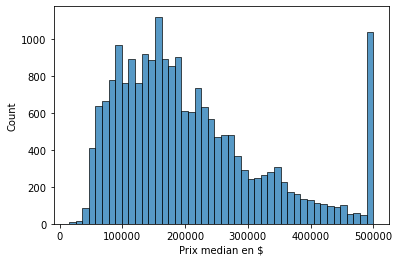

In [20]:
sns.histplot(df,x="Prix median en $")

In [21]:
from mlflow.models.signature import infer_signature

In [22]:
X, y = sklearn.datasets.fetch_california_housing(return_X_y=True)

In [23]:
signature = infer_signature(X,y)

In [24]:
import mlflow.sklearn

In [25]:
import mlflow

In [26]:
mlflow.sklearn.save_model(reg_loaded,"mlflow_model",signature=signature)

MlflowException: Path 'mlflow_model' already exists and is not empty

In [27]:
import requests

In [28]:
col=["MedInc", "HouseAge" ,"AveRooms","AveBedrms","Population" ,"AveOccup" ,"Latitude","Longitude"]
X_te=pd.DataFrame([(0, 0, 0, 0, 0, 0, 0,  0)], columns=col )
url = 'http://127.0.0.1:5000/invocations'
data = {"MedInc": 0, "HouseAge" : 0, "AveRooms" : 0,"AveBedrms" : 0,"Population" : 0,"AveOccup" : 0,"Latitude" : 0,"Longitude" : 0}
headers = {'Content-Type': 'application/json',}
http_data = X_te.to_json(orient='split')
response = requests.post(url,headers=headers, data=http_data)

responseJson = response.json()

responseJson[0]

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /invocations (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001EC9B6FC700>: Failed to establish a new connection: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée'))

In [ ]:
response

<Response [200]>

In [ ]:
http_data:{"columns":["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"],"index":[0],"data":[[0,0,0,0,0,0,0,0]]}

In [ ]:
headers = {'Content-Type': 'application/json',}
url = 'http://127.0.0.1:5000/invocations'
data = X_te.to_json(orient='split')
response = requests.post(url,headers=headers, data=data)
responseJson = response.json()
pred = round(responseJson[0]*100000,0)
pred

155232.0

In [ ]:
responseJson

[1.5523197223039702]

In [ ]:
response

<Response [200]>

In [55]:
df = pd.DataFrame(X,columns=X_te.columns)

In [56]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [59]:
df.Latitude.mean(),df.Longitude.mean()

(35.6318614341087, -119.56970445736148)

In [ ]:
X_te

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt

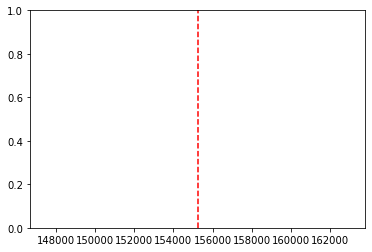

In [ ]:
fig2 = plt.figure()
px.histogram(df, x="Prix median en $")
plt.axvline(x=pred,color='red',linestyle='--')

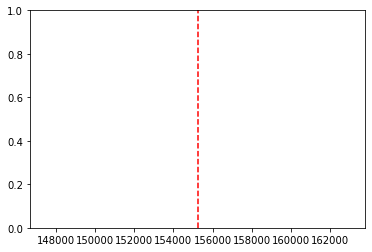

In [ ]:
fig2

In [ ]:
plt.histogram(df, x="Prix median en $")

AttributeError: module 'matplotlib.pyplot' has no attribute 'histogram'

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <BarContainer object of 10 artists>)

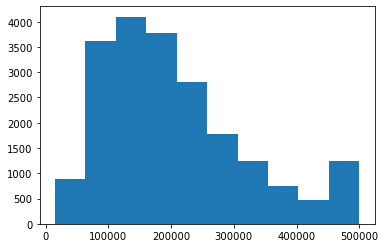

In [ ]:
plt.hist(x=df["Prix median en $"])

<AxesSubplot:>

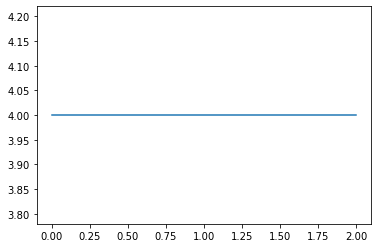

In [ ]:
sns.lineplot(y=[0,1,2],x=[4,4,4])

In [ ]:
fig2 = plt.figure()
px.histogram(df, x="Prix median en $")
px.line(x=[250000,250000],y=[0,500000])
plt.show()
fig2.show()

<Figure size 432x288 with 0 Axes>

C:\Users\33638\AppData\Local\Temp\ipykernel_12756\3810145519.py:5: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



In [ ]:
px.histogram(df, x="Prix median en $")

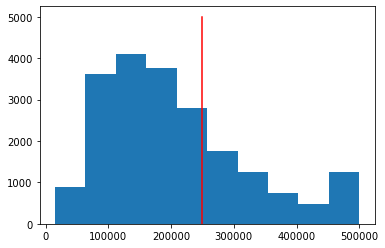

In [ ]:
f = plt.figure()
plt.hist(x=df["Prix median en $"])
plt.plot([250000,250000],[0,5000],color="red")
plt.show()

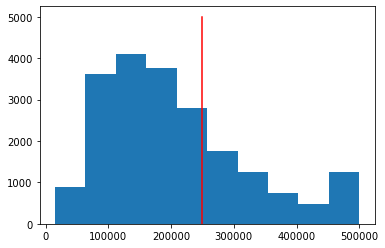

In [29]:
im = Image.open('Plot generated using Matplotlib.png')
im

In [30]:
fig = plt.figure()
plt.hist(x=df["Prix median en $"])
plt.axvline(x=250000,color="red")
plt.close(fig)
plt.savefig("Plot generated using Matplotlib.png")

NameError: name 'plt' is not defined

In [31]:
f

NameError: name 'f' is not defined

In [38]:
reg_loaded.predict(np.array([0,0,0,0,0,0,0,0]).reshape(1, -1))[0]

1.5523197223039702

In [40]:
import plotly.express as px

In [52]:
token = "pk.eyJ1IjoidGhvbWFzamN0IiwiYSI6ImNsMnN6NnVkYzAzbDczaWxya28xMTI5aW0ifQ.zFr4fMzbO2iMmBeAydU4Mg"
fig=px.scatter_mapbox(pd.DataFrame({"lat":[36.95],"long":[-120]}),lat="lat", lon="long", zoom=5,center=dict(lat=36.95, lon=-120))
fig.update_layout(mapbox_style="dark", mapbox_accesstoken=token)
fig.show()

In [51]:
pd.DataFrame({"lat":[36.95],"long":[-120]})

,lat,long
0,36.95,-120
